## Import Necessary Libraries

In [2]:
%pip install ipynb

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
import re

from glob import glob

import librosa

import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

## Access Audio Files

In [2]:
main_path  = r'C:\Resume_projects\flute_teaching_kit\data\notes'
notes = [f for f in os.listdir(main_path) if os.path.isdir(os.path.join(main_path, f))]

notes

['dha', 'ga', 'ma', 'ni', 'pa', 're', 'sa', "sa'"]

In [3]:
for i in notes:
    note_path = os.path.join(main_path, i)
    audios = os.listdir(note_path)

    print(audios)

['dha_1.wav', 'dha_2.wav', 'dha_3.wav', 'dha_4.wav', 'dha_5.wav']
['ga_1.wav', 'ga_2.wav', 'ga_3.wav', 'ga_4.wav', 'ga_5.wav']
['ma_1.wav', 'ma_2.wav', 'ma_3.wav', 'ma_4.wav', 'ma_5.wav']
['ni_1.wav', 'ni_2.wav', 'ni_3.wav', 'ni_4.wav', 'ni_5.wav']
['pa_1.wav', 'pa_2.wav', 'pa_3.wav', 'pa_4.wav', 'pa_5.wav']
['re_1.wav', 're_2.wav', 're_3.wav', 're_4.wav', 're_5.wav']
['sa_1.wav', 'sa_2.wav', 'sa_3.wav', 'sa_4.wav', 'sa_5.wav']
["sa'_1.wav", "sa'_2.wav", "sa'_3.wav", "sa'_4.wav", "sa'_5.wav"]


## Data Understanding

In [4]:
sample_audio_file = r"C:\Resume_projects\flute_teaching_kit\data\notes\sa\sa_1.wav"

<Axes: >

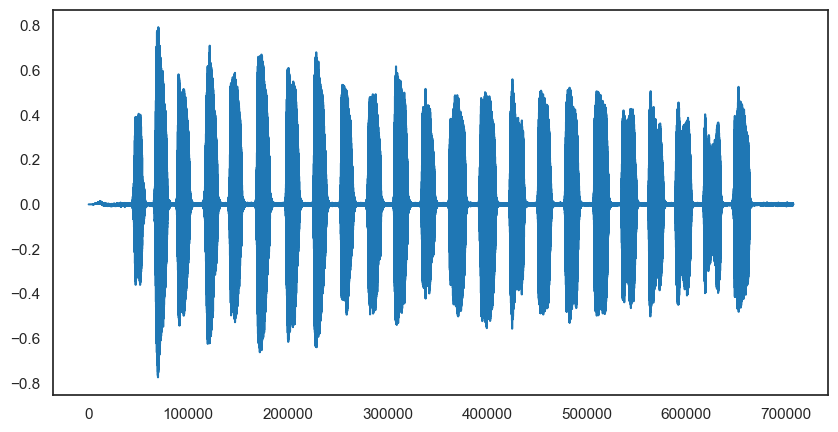

In [5]:
y, sr = librosa.load(sample_audio_file)

raw_series = pd.Series(y)
raw_series.plot(figsize=(10, 5))

In [6]:
intervals = librosa.effects.split(y, top_db=20)

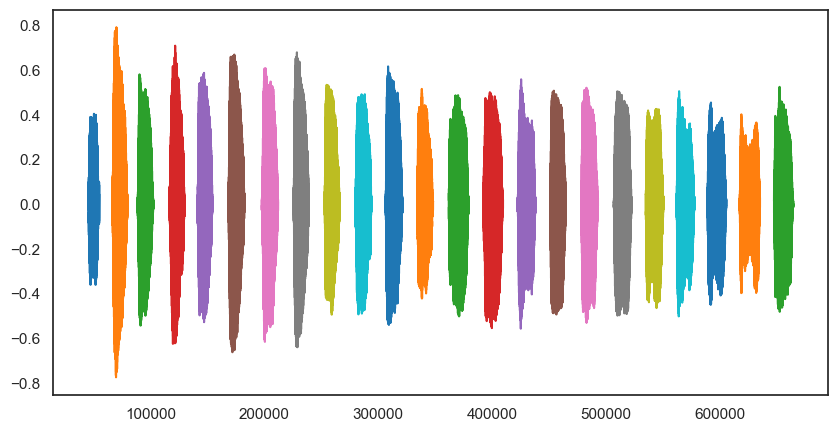

In [7]:
for i in intervals:
    raw_series[i[0]: i[1]].plot(figsize=(10, 5))

In [8]:
D = librosa.stft(y)
sound_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

sound_db

array([[-80.      , -71.05445 , -64.81971 , ..., -63.603653, -71.892624,
        -65.28664 ],
       [-80.      , -72.43863 , -68.55788 , ..., -61.793148, -65.42604 ,
        -71.79146 ],
       [-80.      , -76.55194 , -80.      , ..., -67.21176 , -67.309944,
        -69.94304 ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [9]:
sound_db.shape

(1025, 1382)

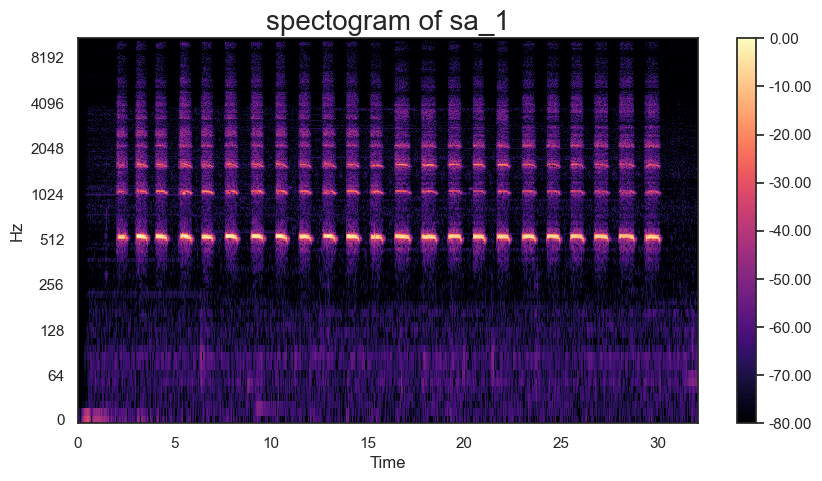

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(sound_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)

ax.set_title('spectogram of sa_1', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [11]:
mel_D = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20,)
mel_sound_db = librosa.amplitude_to_db(mel_D, ref=np.max)

mel_sound_db

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

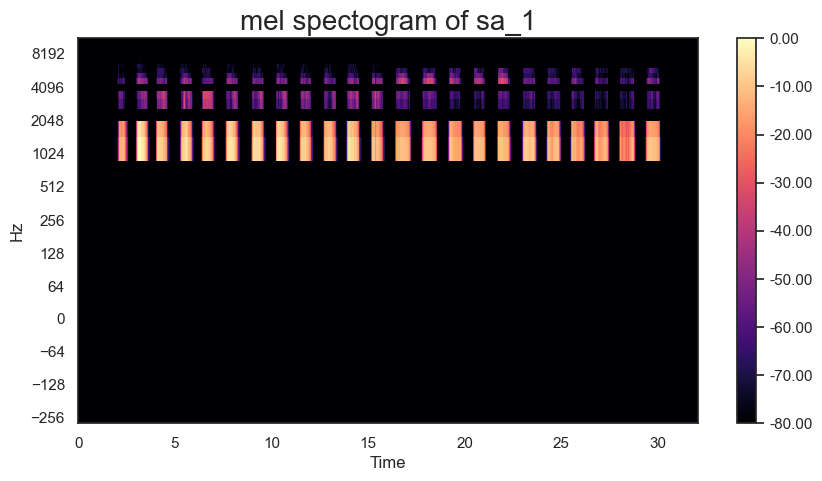

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(mel_sound_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)

ax.set_title('mel spectogram of sa_1', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### Understanding single data "sa" sample

<Axes: >

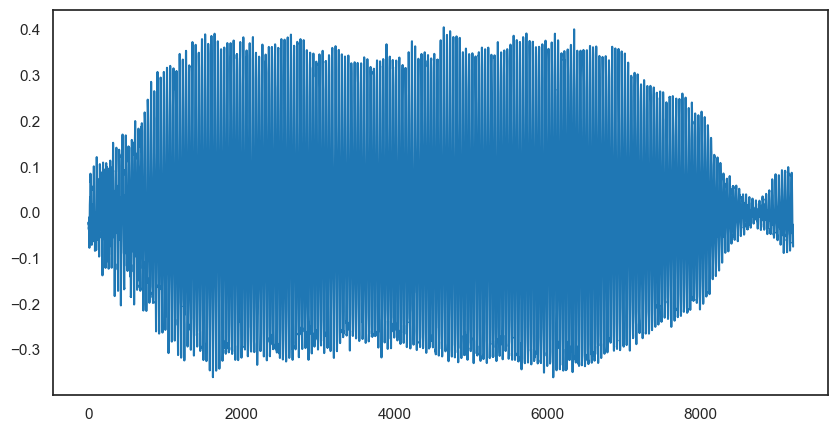

In [13]:
y, sr = librosa.load(sample_audio_file)

y = y[intervals[0][0]: intervals[0][1]]

sa_sample = pd.Series(y)
sa_sample.plot(figsize=(10, 5))

In [14]:
D_sa_sample = librosa.stft(y)
sound_db_sa_sample = librosa.amplitude_to_db(np.abs(D_sa_sample), ref=np.max)

sound_db_sa_sample

array([[-54.310577, -55.797417, -56.499565, ..., -47.13796 , -47.522953,
        -54.134792],
       [-56.709995, -56.364433, -52.333748, ..., -54.407944, -50.245987,
        -54.47308 ],
       [-59.547764, -62.779507, -57.45852 , ..., -62.064056, -56.126602,
        -56.007717],
       ...,
       [-78.50389 , -80.      , -80.      , ..., -80.      , -77.44401 ,
        -71.43657 ],
       [-78.50586 , -80.      , -80.      , ..., -80.      , -77.44503 ,
        -71.43774 ],
       [-78.50626 , -80.      , -80.      , ..., -80.      , -77.44547 ,
        -71.43828 ]], dtype=float32)

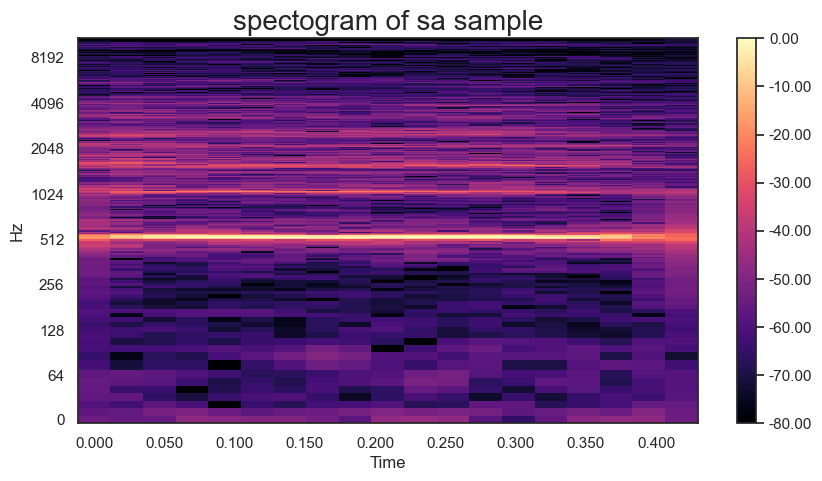

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(sound_db_sa_sample,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)

ax.set_title('spectogram of sa sample', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [16]:
mel_D_sa = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=20,)
mel_sound_db_sa = librosa.amplitude_to_db(mel_D_sa, ref=np.max)

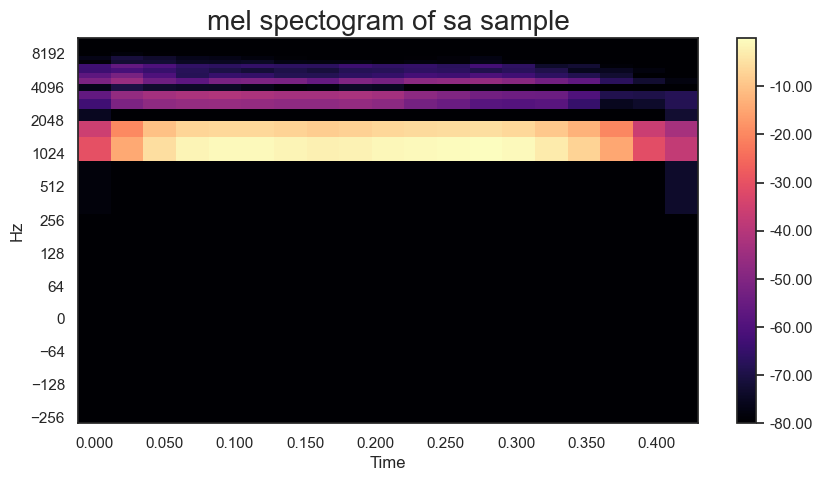

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(mel_sound_db_sa,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)

ax.set_title('mel spectogram of sa sample', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()